In [20]:
label_file = "C:\\Users\\Azee\\OneDrive\\Desktop\\BMI\Face-to-height-weight-BMI-estimation--master\\BMI data - Sheet1.csv"

In [21]:
import pandas as pd

In [22]:
image_df = pd.DataFrame(id_path,columns=['UID','path'])

In [23]:
profile_df = pd.read_csv(label_file)

In [24]:
profile_df

,id,UID,name,height,weight,BMI
0,1,akshay,akshay kumar,1.78,80,25.249337
1,2,ja,john abraham,1.82,94,28.378215
2,3,varun,varun dhawan,1.68,78,27.636054
3,4,tiger,Tiger shroff,1.75,72,23.510204
4,5,salman,Salman khan,1.74,75,24.772097
5,6,srk,Shahrukh khan,1.73,75,25.059307
6,7,ayushman,ayushman khurana,1.68,72,25.510204
7,8,vikky,vicky kaushal,1.83,80,23.888441
8,9,rajkumar,rajkumar rao,1.70,72,24.913495
9,10,nawaz,nawazuddin,1.68,60,21.258503


In [25]:
data_folder = "C:\\Users\\Azee\\OneDrive\\Desktop\\BMI\\Face-to-height-weight-BMI-estimation--master\\height_weight"

In [26]:
from glob import glob
all_files = glob(data_folder+"/*")

all_jpgs = sorted([img for img in all_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])

print("Total {} photos ".format(len(all_jpgs)))

Total 226 photos 


In [27]:
from pathlib import Path as p

In [28]:
def get_index_of_digit(string):
    import re
    match = re.search("\d", p(string).stem)
    return match.start(0)

In [29]:
id_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in all_jpgs ]

In [30]:
data_df = image_df.merge(profile_df) ## merged the training images with their profile

In [31]:
data_df

,UID,path,id,name,height,weight,BMI
0,akshay,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,1,akshay kumar,1.78,80,25.249337
1,akshay,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,1,akshay kumar,1.78,80,25.249337
2,akshay,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,1,akshay kumar,1.78,80,25.249337
3,akshay,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,1,akshay kumar,1.78,80,25.249337
4,akshay,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,1,akshay kumar,1.78,80,25.249337
...,...,...,...,...,...,...,...
221,vikky,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,8,vicky kaushal,1.83,80,23.888441
222,vikky,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,8,vicky kaushal,1.83,80,23.888441
223,vikky,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,8,vicky kaushal,1.83,80,23.888441
224,vikky,C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-hei...,8,vicky kaushal,1.83,80,23.888441


## Extract face embedding using facenet pretrained architecture

In [32]:
import face_recognition
import numpy as np

In [33]:
def get_face_encoding(image_path):
    print(image_path)
    picture_of_me = face_recognition.load_image_file(image_path)
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print("no face found !!!")
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()

In [34]:
all_faces = []

In [35]:
for images in data_df.path:
    face_enc = get_face_encoding(images)
    all_faces.append(face_enc)

C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay1.jpeg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay10.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay11.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay12.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay13.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay14.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay15.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay16.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight\akshay17.jpg
C:\Users\Azee\OneDrive\Desktop\BMI\Fa

In [36]:
X = np.array(all_faces) ## This is the training data matrix
Y=np.array(all_faces)

In [37]:
y_height = data_df.height.values ## all labels
y_weight = data_df.weight.values
y_BMI = data_df.BMI.values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test ,y_BMI_train, y_BMI_test = train_test_split(X, y_height,y_weight,y_BMI, random_state=1)

## Metric to check the goodness of fit

In [39]:
def report_goodness(model,X_test,y_test,predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test
    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

## Model selection 

We will compare few regression model and select the one with better test score . We will compare :

Linear Regression

Ridge Linear Regression

Random Forest Regressor

Kernel Ridge Regressiobn


In [40]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import  linear_model
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# simple linear regression

## Height

In [41]:
model_height = linear_model.LinearRegression()

In [42]:
model_height = model_height.fit(X_train,np.log(y_height_train))

report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.00
Variance score: 0.39
Model Performance
Average Error: 0.0244 degrees.
Accuracy = 95.49%.


We can see the model is only able to explain 39% of the total variance among the variables. There is a room for improvement.

## Weight

In [43]:
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train,np.log(y_weight_train))

In [44]:
report_goodness(model_height,X_test,y_weight_test)

Mean squared error: 13.87
Variance score: -618.25
Model Performance
Average Error: 3.7218 degrees.
Accuracy = 12.53%.


We can see we have got a negative value of R2. This means the the distnace between the predicted and actual height is very high or in another words our model has underfitted.

## BMI

In [45]:
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))

In [46]:
report_goodness(model_height,X_test,y_BMI_test)

Mean squared error: 6.99
Variance score: -568.72
Model Performance
Average Error: 2.6423 degrees.
Accuracy = 16.81%.


We have similar performance in case of BMI as well

## Ridge Linear Regression

## Height

In [47]:
model_height = Ridge(fit_intercept=True, alpha=0.0015, random_state=4)

In [48]:
model_height = model_height.fit(X_train,np.log(y_height_train))

report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.00
Variance score: 0.53
Model Performance
Average Error: 0.0206 degrees.
Accuracy = 96.21%.


## Weight

In [49]:
model_weight = Ridge(fit_intercept=True, alpha=0.0015, random_state=4)

In [50]:
model_weight = model_weight.fit(X_train,np.log(y_weight_train))

report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.01
Variance score: 0.65
Model Performance
Average Error: 0.0730 degrees.
Accuracy = 98.29%.


## BMI

In [51]:
model_BMI = Ridge(fit_intercept=True, alpha=0.0015, random_state=4)

In [52]:
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))

report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.69
Model Performance
Average Error: 0.0485 degrees.
Accuracy = 98.46%.


## Random Forest Regressor

## Height

In [53]:
model_height = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

In [54]:
model_height = model_height.fit(X_train,np.log(y_height_train))

report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.00
Variance score: 0.51
Model Performance
Average Error: 0.0200 degrees.
Accuracy = 96.28%.


#### With Hyperparameter tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()


In [56]:
rf_height_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_height_model.fit(X_train,np.log(y_height_train))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

Mean squared error: 0.00
Variance score: 0.75
Model Performance
Average Error: 0.0134 degrees.
Accuracy = 97.49%.


In [ ]:
report_goodness(rf_height_model,X_test,y_height_test)

We see our variance score has increased

## Weight

In [57]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

In [58]:
model_weight = model_weight.fit(X_train,np.log(y_weight_train))

report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.01
Variance score: 0.66
Model Performance
Average Error: 0.0653 degrees.
Accuracy = 98.45%.


#### With Hyperparameter tuning

In [59]:
rf_weight_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_weight_model.fit(X_train,np.log(y_weight_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=230, min_samples_split=10, max_features=sqrt, max_depth=37, total=   1.1s
[CV] min_samples_leaf=1, bootstrap=True, n_estimators=120, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=230, min_samples_split=10, max_features=sqrt, max_depth=37, total=   1.4s
[CV] min_samples_leaf=4, bootstrap=True, n_estimators=780, min_samples_split=2, max_features=sqrt, max_depth=73 
[CV]  min_samples_leaf=1, bootstrap=True, n_estimators=120, min_samples_split=5, max_features=sqrt, max_depth=91, total=   0.4s
[CV] min_samples_leaf=4, bootstrap=True, n_estimators=780, min_samples_split=2, max_features=sqrt, max_depth=73 
[CV]  min_samples_leaf=1, bootstrap=True, n_estimators=120, min_samples_split=5, max_features=sqrt, max_depth=91, total=   0.5s
[CV] min_samples_leaf=4, bootstrap=True, n_estimators=780, min_samples_split=2, max_features=sqrt, max_depth=73 
[CV]  min_samples_leaf=2, bootst

[CV]  min_samples_leaf=4, bootstrap=False, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=91, total=   0.1s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19, total=   3.2s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=450, min_samples_split=2, max_features=auto, max_depth=10, total=   6.6s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=450, min_samples_split=2, max_features=auto, max_depth=10, total=   6.4s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=37 
[CV]  min_samples_leaf=1, bo

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [60]:
report_goodness(rf_weight_model,X_test,y_weight_test)

Mean squared error: 0.00
Variance score: 0.83
Model Performance
Average Error: 0.0443 degrees.
Accuracy = 98.95%.


## BMI

In [61]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

In [62]:
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))

report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.74
Model Performance
Average Error: 0.0408 degrees.
Accuracy = 98.70%.


#### With Hyperparameter tuning

In [63]:
rf_BMI_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_BMI_model.fit(X_train,np.log(y_BMI_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=230, min_samples_split=10, max_features=sqrt, max_depth=37, total=   1.2s
[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=230, min_samples_split=10, max_features=sqrt, max_depth=37, total=   1.1s
[CV] min_samples_leaf=1, bootstrap=True, n_estimators=120, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV] min_samples_leaf=4, bootstrap=True, n_estimators=780, min_samples_split=2, max_features=sqrt, max_depth=73 
[CV]  min_samples_leaf=1, bootstrap=True, n_estimators=120, min_samples_split=5, max_features=sqrt, max_depth=91, total=   0.6s
[CV] min_samples_leaf=4, bootstrap=True, n_estimators=780, min_samples_split=2, max_features=sqrt, max_depth=73 
[CV]  min_samples_leaf=2, bootstrap=False, n_estimators=340, min_samples_split=10, max_features=auto, max_depth=None, total=   6.4s
[CV] min_samples_leaf=4, bootstrap=True, n_estimators=780, min_samples_split=2, max_features=sqrt, max_depth=73 
[CV]  min_samples_leaf=1, bo

[CV]  min_samples_leaf=4, bootstrap=False, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=91, total=   0.2s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19, total=   3.2s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=450, min_samples_split=2, max_features=auto, max_depth=10, total=   6.9s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  min_samples_leaf=1, bootstrap=False, n_estimators=450, min_samples_split=2, max_features=auto, max_depth=10, total=   7.6s
[CV] min_samples_leaf=2, bootstrap=True, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=37 
[CV]  min_samples_leaf=1, bo

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [64]:
report_goodness(rf_BMI_model,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.87
Model Performance
Average Error: 0.0273 degrees.
Accuracy = 99.12%.


## Kernel Ridge

## Height

In [65]:
model_height = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

In [66]:
model_height = model_height.fit(X_train,np.log(y_height_train))

report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.00
Variance score: 0.80
Model Performance
Average Error: 0.0132 degrees.
Accuracy = 97.52%.


## Weight

In [67]:
model_weight = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

In [68]:
model_weight = model_weight.fit(X_train,np.log(y_weight_train))

report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.00
Variance score: 0.86
Model Performance
Average Error: 0.0458 degrees.
Accuracy = 98.92%.


## BMI

In [69]:
model_BMI = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

In [70]:
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))

report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.88
Model Performance
Average Error: 0.0311 degrees.
Accuracy = 99.01%.


In [71]:
report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.88
Model Performance
Average Error: 0.0311 degrees.
Accuracy = 99.01%.


In [73]:
import joblib

## Conclusion : 

We found that kernelised Ridge regression outperformed all the models in terms of the mean squared error and expalined variance

## save all models 

In [75]:
#from sklearn.externals import joblib

# save the model to disk

In [76]:
height_model = 'weight_predictor.model'
weight_model = 'height_predictor.model'
bmi_model = 'bmi_predictor.model'
joblib.dump(model_height, height_model)
joblib.dump(model_weight, weight_model)
joblib.dump(model_BMI, bmi_model)

['bmi_predictor.model']

# load the model from disk

In [77]:
height_model = joblib.load(height_model)
weight_model = joblib.load(weight_model)
bmi_model = joblib.load(bmi_model)

## test 

In [99]:
import numpy

def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)

In [106]:
def predict_height_width_BMI(test_image,height_model,weight_model,bmi_model):
    test_array = np.expand_dims(np.array(get_face_encoding(test_image)),axis=0)
    height = np.asscalar(np.exp(height_model.predict(test_array)))
    weight = np.asscalar(np.exp(weight_model.predict(test_array)))
    bmi = np.asscalar(np.exp(bmi_model.predict(test_array)))
    return {'height':height,'weight':weight,'bmi':bmi}


    

## prediction on test images

In [107]:
from IPython.display import Image

In [108]:
import numpy

def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)

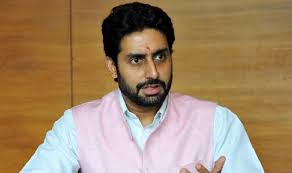

In [109]:
test_image = "C:\\Users\\Azee\\OneDrive\\Desktop\\BMI\\Face-to-height-weight-BMI-estimation--master\\height_weight_test\\abhishek2.jpg"
Image(test_image)

In [110]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

C:\Users\Azee\OneDrive\Desktop\BMI\Face-to-height-weight-BMI-estimation--master\height_weight_test\abhishek2.jpg


{'height': 1.7414791225990711,
 'weight': 77.03117963061536,
 'bmi': 25.39978285326271}

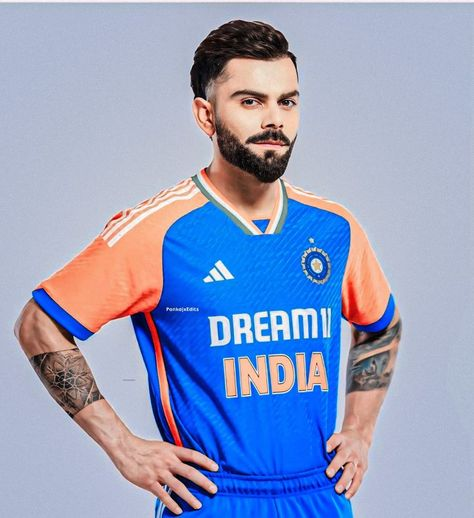

In [113]:
test_image = "C:\\Users\\Azee\\OneDrive\\Desktop\\INEURON\\Images\\2.jpg"
Image(test_image)

In [114]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

C:\Users\Azee\OneDrive\Desktop\INEURON\Images\2.jpg


{'height': 1.6831791225448482,
 'weight': 73.52702027603917,
 'bmi': 25.952923995531055}

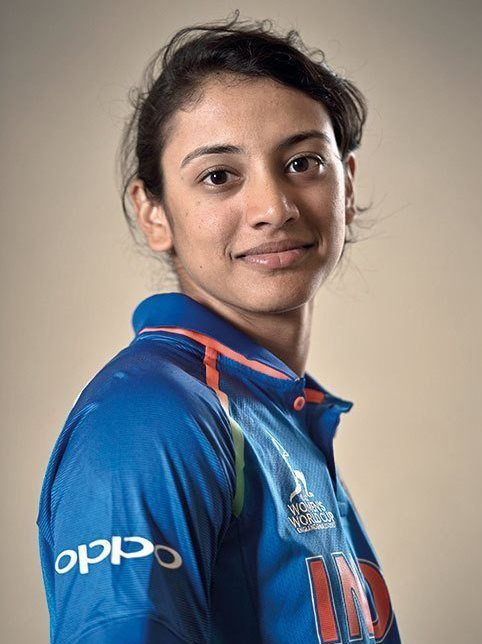

In [115]:
test_image = "C:\\Users\\Azee\\OneDrive\\Desktop\\INEURON\\Images\\52.jpg"
Image(test_image)

In [116]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

C:\Users\Azee\OneDrive\Desktop\INEURON\Images\52.jpg


{'height': 1.621159979863767,
 'weight': 59.90453011589667,
 'bmi': 22.79333731786224}

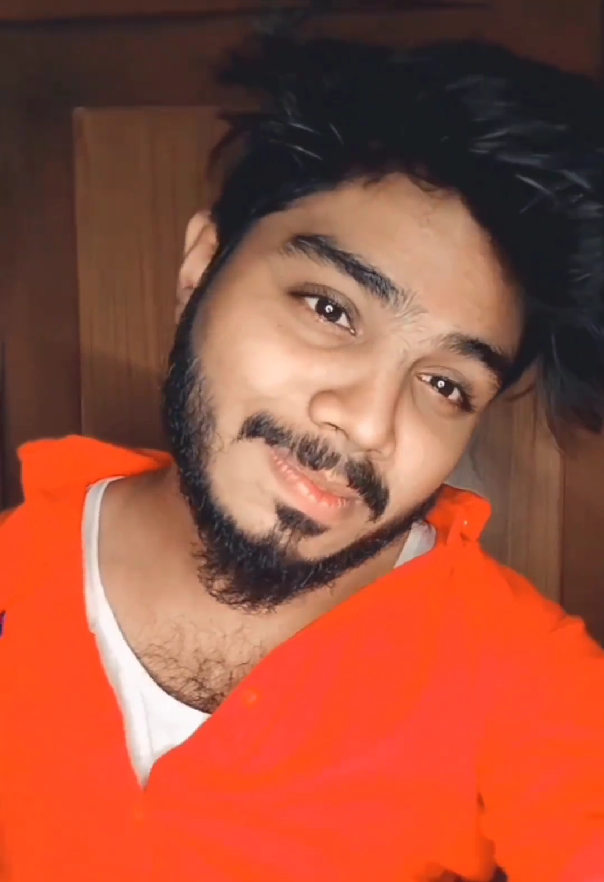

In [118]:
test_image ="C:\\Users\\Azee\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-06-19 162345.png"
Image(test_image)

In [119]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

C:\Users\Azee\OneDrive\Pictures\Screenshots\Screenshot 2024-06-19 162345.png


{'height': 1.6936849654425221,
 'weight': 67.11760456970315,
 'bmi': 23.39759306449241}

## Prediction on some celebrities which is not in training set

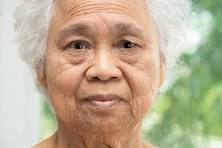

In [141]:
test_image= "C:\\Users\\Azee\\OneDrive\\Pictures\\Screenshots\\download (1).jpeg"
Image(test_image)

In [142]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

C:\Users\Azee\OneDrive\Pictures\Screenshots\download (1).jpeg


{'height': 1.6386166571043304,
 'weight': 54.64894464236164,
 'bmi': 20.352935155342195}

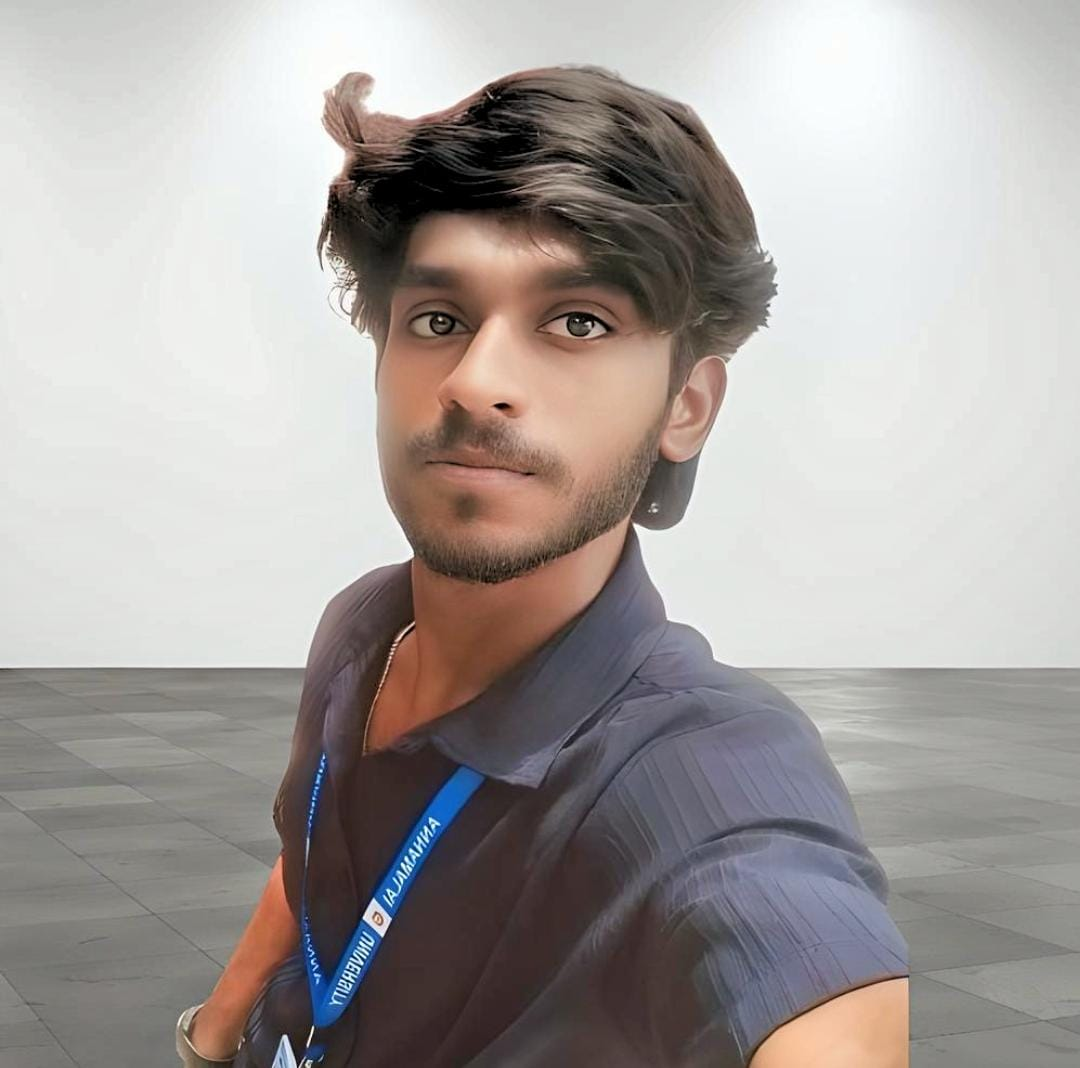

In [146]:
test_image= "C:\\Users\\Azee\\Downloads\\IMG-20240422-WA0062.jpg" 
Image(test_image)

In [147]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

C:\Users\Azee\Downloads\IMG-20240422-WA0062.jpg


{'height': 1.7195251215953071,
 'weight': 71.23968607374218,
 'bmi': 24.09378035506061}

In [145]:
test_image= 'height_weight_test/rampal2.jpg' 
Image(test_image)

FileNotFoundError: No such file or directory: 'height_weight_test/rampal2.jpg'

FileNotFoundError: No such file or directory: 'height_weight_test/rampal2.jpg'

<IPython.core.display.Image object>

In [252]:
predict_height_width_BMI(test_image1,height_model,weight_model,bmi_model)

height_weight_test/rampal2.jpg


{'bmi': 22.992710795255977,
 'height': 1.8096634066313946,
 'weight': 75.64910124740388}

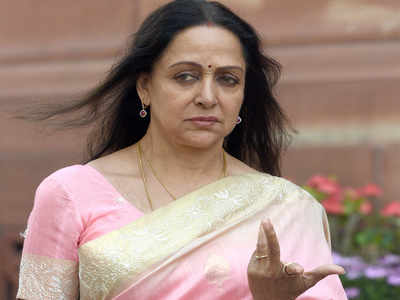

In [289]:
test_image= 'height_weight_test/hema1.jpg' 
Image(test_image)

In [288]:
predict_height_width_BMI(test_image1,height_model,weight_model,bmi_model)

height_weight_test/jaya1.jpg


{'bmi': 24.65166315788692,
 'height': 1.6260804446802757,
 'weight': 65.24245020581978}

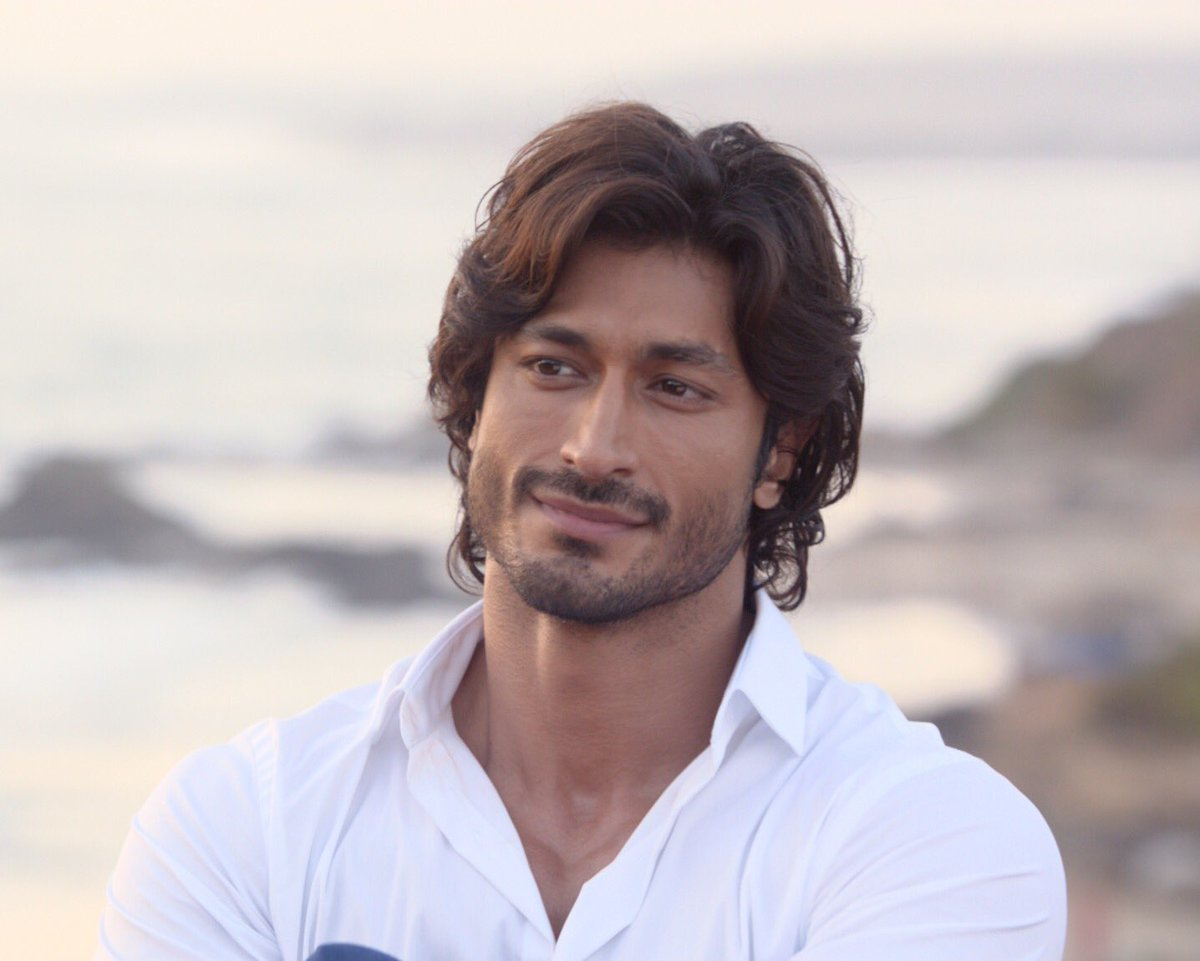

In [290]:
test_image= 'height_weight_test/jamwal1.jpg'
Image(test_image)

In [254]:
predict_height_width_BMI(test_image1,height_model,weight_model,bmi_model)

height_weight_test/jamwal1.jpg


{'bmi': 22.586685253837235,
 'height': 1.7923486154087216,
 'weight': 72.76666251284472}

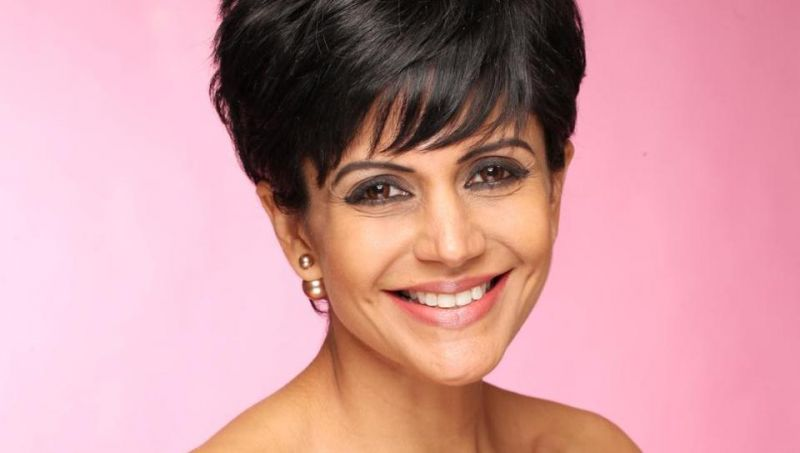

In [291]:
test_image= 'height_weight_test/mandira1.jpg'
Image(test_image)

In [292]:
predict_height_width_BMI(test_image1,height_model,weight_model,bmi_model)

height_weight_test/jaya1.jpg


{'bmi': 24.65166315788692,
 'height': 1.6260804446802757,
 'weight': 65.24245020581978}

## Conclusion

Face is almost able to predict BMI correctly. There are places where it is going wrong for example if you predict heigt of really tall celebrity like rampal.
This behavior is acceptable since we have not trained the model on such tall celebrities. Other,issue that i noticed is the face to weight tagging is not that much appropriate since the faces are from diffrent times but the weight is always the latest.
We can get even better model if we have these mappings right.

Also we can improve on height prediction if we model the torso alongwith the face. However , we need to get torso to correct height labeled data for this. In the absence of such data we can rely on the face as height estimator.